# Exercício 1

**Aluno:** Rafael Lúcio Negrão Cordeiro<br/>
**Matrícula:** 201310323<br/>
**Disciplina:** CET961 - Engenharia Assistida por Computador

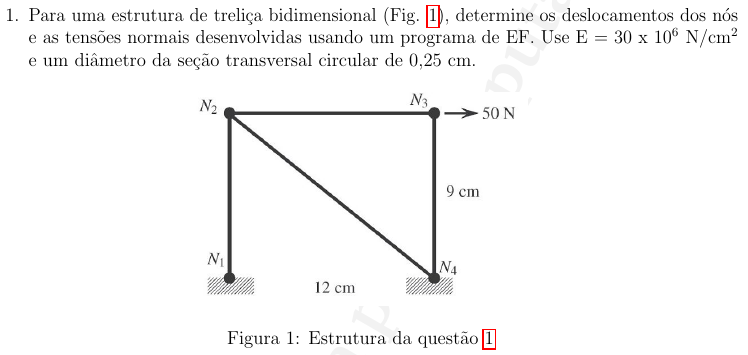

In [1]:
import numpy as np

d = 0.25 # cm de diametro
A = np.pi * ((0.25/2) ** 2)


E = 30e6 # N / cm


L1 = 9 # cm
L2 = 12 # cm
L3 = 9 # cm
L4 = 15 # cm

con1 = (1, 2)
con2 = (2, 3)
con3 = (3, 4)
con4 = (4, 2)


k = lambda E, A, L: (E * A) / (L / 100)

k1 = k(E, A, L1)
k2 = k(E, A, L2)
k3 = k(E, A, L3)
k4 = k(E, A, L4)


alpha = np.array([90, 0, -90, 131.41]) # Vetor criado com angulos em graus

F = 50 # N
Fx = F * np.cos(0 * np.pi / 180) # 225 * np.pi / 180 é o angulo de 225 em radianos
Fy = F * np.sin(0 * np.pi / 180)

In [76]:
print("""
Componente da força aplicada na, horizontal: %.2e N
Componente da força aplicada na, vertical: %.2e N
""" % tuple([Fx, Fy]))


Componente da força aplicada na, horizontal: 5.00e+01 N
Componente da força aplicada na, vertical: 0.00e+00 N



In [67]:
print("""
Constante elástica do corpo 1: %.2e N/m 
Constante elástica do corpo 2: %.2e N/m
Constante elástica do corpo 3: %.2e N/m
Constante elástica do corpo 4: %.2e N/m
""" % tuple([k1, k2, k3, k4]))


Constante elástica do corpo 1: 1.64e+07 N/m 
Constante elástica do corpo 2: 1.23e+07 N/m
Constante elástica do corpo 3: 1.64e+07 N/m
Constante elástica do corpo 4: 9.82e+06 N/m



#### Compondo o sistema na notaçao matricial $[K_{i}^{(g)}]\{U_{i}^{(g)}\} = \{F_{i}^{(g)}\}$, temos:

$$
\begin{split}
    \overbrace{
        \begin{bmatrix}
            k_{1 x 1 (i)} & k_{1 x 2 (i)} & k_{1 x 3 (i)} & k_{1 x 4 (i)}\\
            k_{2 x 1 (i)} & k_{2 x 2 (i)} & k_{2 x 3 (i)} & k_{2 x 4 (i)}\\
            k_{3 x 1 (i)} & k_{3 x 2 (i)} & k_{3 x 3 (i)} & k_{3 x 4 (i)}\\
            k_{4 x 1 (i)} & k_{4 x 2 (i)} & k_{4 x 3 (i)} & k_{4 x 4 (i)}
        \end{bmatrix}
    }^{[K^{(g)}_i]}
    \overbrace{
        \begin{Bmatrix}
            u_{iX}^E\\
            u_{iY}^E\\
            u_{iX}^D\\
            u_{iY}^D
        \end{Bmatrix}
    }^{\{U^{(g)}_i\}}
    =
    \overbrace{
        \begin{Bmatrix}
            F_{iX}^{E}\\
            F_{iY}^{E}\\
            F_{iX}^{D}\\
            F_{iY}^{D}
        \end{Bmatrix}
    }^{\{F^{(g)}_i\}}\\
    \overbrace{
        \frac{E_iA_i}{L_i}
        \begin{bmatrix}
            \cos^2\alpha_i & \cos\alpha_i\sin\alpha_i & -\cos^2\alpha_i & -\cos\alpha_i\sin\alpha_i\\
            \cos\alpha_i\sin\alpha_i & \sin^2\alpha_i & -\cos\alpha_i\sin\alpha_i & -\sin^2\alpha_i\\
            -\cos^2\alpha_i & -\cos\alpha_i\sin\alpha_i & \cos^2\alpha_i & \cos\alpha_i\sin\alpha_i\\
            -\cos\alpha_i\sin\alpha_i & -\sin^2\alpha_i & \cos\alpha_i\sin\alpha_i & \sin^2\alpha_i
        \end{bmatrix}
    }^{[K^{(g)}_i]}
    \overbrace{
        \begin{bmatrix}
            \cos\alpha_i & 0\\
            \sin\alpha_i & 0\\
            0 & \cos\alpha_i\\
            0 & \sin\alpha_i
        \end{bmatrix}
        \begin{Bmatrix}
            u_{i}^E\\
            u_{i}^D
        \end{Bmatrix}
    }^{\{U^{(g)}_i\}}=
    \overbrace{
        \begin{bmatrix}
            \cos\alpha_i & 0\\
            \sin\alpha_i & 0\\
            0 & \cos\alpha_i\\
            0 & \sin\alpha_i
        \end{bmatrix}
        \begin{Bmatrix}
            F_{i}^E\\
            F_{i}^D
        \end{Bmatrix}
    }^{\{F^{(g)}_i\}}
\end{split}
$$

$u_{1X}^E = u_{3X}^E$, $u_{1Y}^E = u_{3Y}^E$


$u_{1X}^D = u_{2X}^E$, $u_{1Y}^D = u_{2Y}^E$

$u_{2X}^D = u_{3X}^D$, $u_{2Y}^D = u_{3Y}^D$

 - Elemento 1: Com $\alpha = 90$
 $$
 K_1 = 
\frac{E_1A_1}{L_1}
\begin{bmatrix}
    0 & 0 & 0 & 0\\
    0 & 1 & 0 & -1\\
    0 & 0 & 0 & 0\\
    0 & -1 & 0 & 1
\end{bmatrix}
\begin{Bmatrix}
    u_{1X}^E\\
    u_{1Y}^E\\
    u_{1X}^D\\
    u_{1Y}^D
\end{Bmatrix}
\Rightarrow
\frac{E_1A_1}{L_1}
\begin{bmatrix}
    0 & 0 & 0 & 0\\
    0 & 1 & 0 & -1\\
    0 & 0 & 0 & 0\\
    0 & -1 & 0 & 1
\end{bmatrix}
\begin{Bmatrix}
    u_{2X}^E\\
    u_{2Y}^E\\
    u_{1X}^D\\
    u_{1Y}^D
\end{Bmatrix}
\Rightarrow
se \frac{E_1A_1}{L_1} = 1.64 x 10^7 \Rightarrow
10^7
\begin{bmatrix}
    0 & 0 & 0 & 0\\
    0 & 1.64 & 0 & -1.64\\
    0 & 0 & 0 & 0\\
    0 & -1.64 & 0 & 1.64
\end{bmatrix}
\begin{Bmatrix}
    u_{2X}^E\\
    u_{2Y}^E\\
    u_{1X}^D\\
    u_{1Y}^D
\end{Bmatrix}
 $$

 - Elemento 2: Com $\alpha = 0$
 $$
 K_2 = 
\frac{E_2A_2}{L_2}
\begin{bmatrix}
    1 & 0 & -1 & 0\\
    0 & 0 & 0 & 0\\
    -1 & 0 & 1 & 0\\
    0 & 0 & 0 & 0
\end{bmatrix}
\begin{Bmatrix}
    u_{2X}^E\\
    u_{2Y}^E\\
    u_{2X}^D\\
    u_{2Y}^D
\end{Bmatrix}
\Rightarrow
\frac{E_2A_2}{L_2}
\begin{bmatrix}
    1 & 0 & -1 & 0\\
    0 & 0 & 0 & 0\\
    -1 & 0 & 1 & 0\\
    0 & 0 & 0 & 0
\end{bmatrix}
\begin{Bmatrix}
    u_{2X}^E\\
    u_{2Y}^E\\
    u_{3X}^D\\
    u_{3Y}^D
\end{Bmatrix}
\Rightarrow
se \frac{E_2A_2}{L_2} = 1.23 x 10^7 \Rightarrow
10^7
\begin{bmatrix}
    1.23 & 0 & -1.23 & 0\\
    0 & 0 & 0 & 0\\
    -1.23 & 0 & 1.23 & 0\\
    0 & 0 & 0 & 0
\end{bmatrix}
\begin{Bmatrix}
    u_{2X}^E\\
    u_{2Y}^E\\
    u_{3X}^D\\
    u_{3Y}^D
\end{Bmatrix}
 $$

 - Elemento 3: Com $\alpha = -90$
 $$
 K_3 = 
\frac{E_3A_3}{L_3}
\begin{bmatrix}
    0 & 0 & 0 & 0\\
    0 & 1 & 0 & -1\\
    0 & 0 & 0 & 0\\
    0 & -1 & 0 & 1
\end{bmatrix}
\begin{Bmatrix}
    u_{3X}^E\\
    u_{3Y}^E\\
    u_{3X}^D\\
    u_{3Y}^D
\end{Bmatrix}
\Rightarrow
\frac{E_3A_3}{L_3}
\begin{bmatrix}
    0 & 0 & 0 & 0\\
    0 & 1 & 0 & -1\\
    0 & 0 & 0 & 0\\
    0 & -1 & 0 & 1
\end{bmatrix}
\begin{Bmatrix}
    u_{3X}^E\\
    u_{3Y}^E\\
    u_{4X}^D\\
    u_{4Y}^D
\end{Bmatrix}
\Rightarrow
se \frac{E_3A_3}{L_3} = 1.64 x 10^7 \Rightarrow
10^7
\begin{bmatrix}
    0 & 0 & 0 & 0\\
    0 & 1.64 & 0 & -1.64\\
    0 & 0 & 0 & 0\\
    0 & -1.64 & 0 & 1.64
\end{bmatrix}
\begin{Bmatrix}
    u_{3X}^E\\
    u_{3Y}^E\\
    u_{4X}^D\\
    u_{4Y}^D
\end{Bmatrix}
 $$

 - Elemento 4: Com $\alpha = 143.13$
 $$
 K_4 = 
\frac{E_4A_4}{L_4}
\begin{bmatrix}
    0.64 & -0.48 & -0.64 & 0.48\\
    -0.48 & 0.36 & 0.48 & -0.36\\
    -0.64 & 0.48 & 0.64 & -0.48\\
    0.48 & -0.36 & -0.48 & 0.36
\end{bmatrix}
\begin{Bmatrix}
    u_{4X}^E\\
    u_{4Y}^E\\
    u_{4X}^D\\
    u_{4Y}^D
\end{Bmatrix}
\Rightarrow
\frac{E_4A_4}{L_4}
\begin{bmatrix}
    0.64 & -0.48 & -0.64 & 0.48\\
    -0.48 & 0.36 & 0.48 & -0.36\\
    -0.64 & 0.48 & 0.64 & -0.48\\
    0.48 & -0.36 & -0.48 & 0.36
\end{bmatrix}
\begin{Bmatrix}
    u_{4X}^E\\
    u_{4Y}^E\\
    u_{2X}^E\\
    u_{2Y}^E
\end{Bmatrix}
\Rightarrow
se \frac{E_4A_4}{L_4} = 0.982 x 10^7 \Rightarrow
10^7
\begin{bmatrix}
    0.63 & -0.47 & -0.63 & 0.47\\
    -0.47 & 0.35 & 0.47 & -0.35\\
    -0.63 & 0.47 & 0.63 & -0.47\\
    0.47 & -0.35 & -0.47 & 0.35
\end{bmatrix}
\begin{Bmatrix}
    u_{4X}^D\\
    u_{4Y}^D\\
    u_{2X}^E\\
    u_{2Y}^E
\end{Bmatrix}
 $$

$$
K =
10^7
\begin{bmatrix}
    0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
    0 & 1.64 & 0 & -1.64 & 0 & 0 & 0 & 0\\
    0 & 0 & 1.86 & -0.47 & -1.23 & 0 & -0.63 & 0.47\\
    0 & -1.64 & -0.47 & 1.99 & 0 & 0 & 0.47 & -0.35\\
    0 & 0 & -1.23 & 0 & 1.23 & 0 & 0 & 0\\
    0 & 0 & 0 & 0 & 0 & 1.64 & 0 & -1.64\\
    0 & 0 & -0.63 & 0.47 & 0 & 0 & 2.27 & -0.01\\
    0 & 0 & 0.47 & -0.35 & 0 & -1.64 & -0.01 & 1.08
\end{bmatrix}
\begin{Bmatrix}
    u_{1X}^D\\
    u_{1Y}^D\\
    u_{2X}^E\\
    u_{2Y}^E\\
    u_{3X}^D\\
    u_{3Y}^D\\
    u_{4X}^D\\
    u_{4Y}^D
\end{Bmatrix}
$$

$$
10^7
\begin{bmatrix}
    0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
    0 & 1.64 & 0 & -1.64 & 0 & 0 & 0 & 0\\
    0 & 0 & 1.86 & -0.47 & -1.23 & 0 & -0.63 & 0.47\\
    0 & -1.64 & -0.47 & 1.99 & 0 & 0 & 0.47 & -0.35\\
    0 & 0 & -1.23 & 0 & 1.23 & 0 & 0 & 0\\
    0 & 0 & 0 & 0 & 0 & 1.64 & 0 & -1.64\\
    0 & 0 & -0.63 & 0.47 & 0 & 0 & 2.27 & -0.01\\
    0 & 0 & 0.47 & -0.35 & 0 & -1.64 & -0.01 & 1.08
\end{bmatrix}
\begin{Bmatrix}
    u_{1X}^D\\
    u_{1Y}^D\\
    u_{2X}^E\\
    u_{2Y}^E\\
    u_{3X}^D\\
    u_{3Y}^D\\
    u_{4X}^D\\
    u_{4Y}^D
\end{Bmatrix}
=
\begin{Bmatrix}
    F_{1X}\\
    F_{1Y}\\
    F_{2X}\\
    F_{2Y}\\
    F_{3X}\\
    F_{3Y}\\
    F_{4X}\\
    F_{4Y}
\end{Bmatrix}
\Rightarrow
10^7
\begin{bmatrix}
    0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
    0 & 1.64 & 0 & -1.64 & 0 & 0 & 0 & 0\\
    0 & 0 & 1.86 & -0.47 & -1.23 & 0 & -0.63 & 0.47\\
    0 & -1.64 & -0.47 & 1.99 & 0 & 0 & 0.47 & -0.35\\
    0 & 0 & -1.23 & 0 & 1.23 & 0 & 0 & 0\\
    0 & 0 & 0 & 0 & 0 & 1.64 & 0 & -1.64\\
    0 & 0 & -0.63 & 0.47 & 0 & 0 & 2.27 & -0.01\\
    0 & 0 & 0.47 & -0.35 & 0 & -1.64 & -0.01 & 1.08
\end{bmatrix}
\begin{Bmatrix}
    0\\
    0\\
    u_{2X}^E\\
    u_{2Y}^E\\
    u_{3X}^D\\
    u_{3Y}^D\\
    0\\
    0
\end{Bmatrix}
=
\begin{Bmatrix}
    R_{1X}\\
    R_{1Y}\\
    0\\
    0\\
    50\\
    0\\
    R_{4X}\\
    R_{4Y}
\end{Bmatrix}
$$

#### Como as forças podem ser encontradas pela expressao $F=AE\Delta L/L$, pode-se eliminar as linhas e colunas que correspondem aos deslocamentos nulos. Resultando em:

$$
10^7
\begin{bmatrix}
    1.86 & -0.47 & -1.23 & 0\\
    -0.47 & 1.99 & 0 & 0\\
    -1.23 & 0 & 1.23 & 0\\
    0 & 0 & 0 & 1.64
\end{bmatrix}
\begin{Bmatrix}
    u_{2X}^E\\
    u_{2Y}^E\\
    u_{3X}^D\\
    u_{3Y}^D
\end{Bmatrix}
=
\begin{Bmatrix}
    0\\
    0\\
    50\\
    0
\end{Bmatrix}
$$

#### Que pode ser resolvido da seguinte forma:

In [3]:
from itertools import cycle

coeffs = np.mat([[1.86, -0.47, -1.23, 0],
                 [-0.47, 1.99, 0, 0],
                 [-1.23, 0, 1.23, 0],
                 [0, 0, 0, 1.64]]) * 10e7
image = np.array([0, 0, Fx, Fy])

In [4]:
resultado = np.linalg.solve(coeffs, image)

In [5]:
print("""
Deslocamento do nó 2, na horizontal = %.2em,
Deslocamento do nó 2, na vertical = %.2em,
Deslocamento do nó 3, na horizontal = %.2em,
Deslocamento do nó 3, na vertical = %.2em""" % tuple(resultado))


Deslocamento do nó 2, na horizontal = 9.63e-07m,
Deslocamento do nó 2, na vertical = 2.28e-07m,
Deslocamento do nó 3, na horizontal = 1.37e-06m,
Deslocamento do nó 3, na vertical = 0.00e+00m


#### A expressao $F=\frac{AE\Delta L}{L}$ tem a seguinte implicaçao:

$$
F = \frac{AE}{L}((\frac{x_j - x_i}{L})(u_j - u_i) + (\frac{y_j - y_i}{L})(v_j - v_i))
$$

In [6]:
def forca_resultante(A, E, L, xj, xi, yj, yi, uj, ui, vj, vi):
    return (A * 0.0001 * E) * (((xj - xi) * (uj - ui) / L) + ((yj - yi) * (vj - vi) / L)) / L

In [7]:
forca_resultante(A, E, L1, xj = 0, xi = 0, uj = resultado[1], ui = 0, yj = 0, yi = L1, vj = resultado[2], vi = 0)

-2.2415010452752848e-05